# Visualisation

This notebook is used for visualisation of the data distributions.

We only use the train partition to prevent data / insights leaks.

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.mlab as mlab

import os

from sklearn.model_selection import train_test_split

## Load data

In [30]:
from operate_datasets import load_dataset

In [31]:
DATASET_PATH = "~/snd_data/new_dataset/"

In [32]:
full_X, full_y = load_dataset(DATASET_PATH, 'sum')

data_size = full_X.shape[0]

# Train test split
TRAIN_SIZE_RATIO = 0.9
RANDOM_SEED = 1543

all_idx = np.arange(0, data_size)

train_idx, test_idx, _, _ = train_test_split(all_idx, all_idx, 
                                             train_size=TRAIN_SIZE_RATIO, 
                                             random_state=RANDOM_SEED)

train_size = len(train_idx)
test_size  = len(test_idx)

In [33]:
full_X = full_X.reshape(-1, 1)
full_y = full_y.reshape(-1, 1)

In [34]:
X_train = full_X[train_idx]
y_train = full_y[train_idx]

X_test = full_X[test_idx]
y_test = full_y[test_idx]

In [35]:
for clip in np.arange(0,50,5):
    clip_idx = np.where(X_train > clip)[0]
    print('clip %2d  data cut %.3f' % (clip, np.round(len(clip_idx) / train_size, 3)))

clip  0  data cut 0.378
clip  5  data cut 0.145
clip 10  data cut 0.109
clip 15  data cut 0.097
clip 20  data cut 0.091
clip 25  data cut 0.087
clip 30  data cut 0.085
clip 35  data cut 0.083
clip 40  data cut 0.082
clip 45  data cut 0.081


In [36]:
min_clip = 25

## Neutrinos distribution

In [66]:
# distributions
# https://docs.scipy.org/doc/scipy/reference/stats.html

In [81]:
nu_1 = full_y[     :10000]
nu_2 = full_y[10000:20000]
nu_3 = full_y[20000:30000]

In [89]:
import scipy.stats as stats

def plot_prior_distro(data):
    n, bins, patches = plt.hist(data, bins=100, density=True, label='data')

    (K, loc, scale) = stats.exponnorm.fit(data)
    x = np.linspace(0.0, 1.2, 300)
    plt.plot(x, stats.exponnorm.pdf(x, K, loc, scale), label='exp modified normal')

    plt.xlabel(r'$E_{true}$')
    plt.ylabel(r'$\rho$ (density)')
    plt.legend()
    plt.show()

Full data


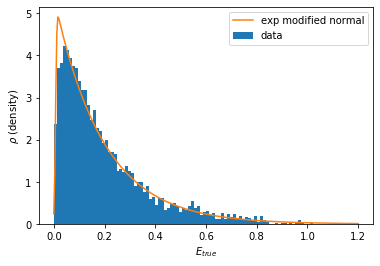

In [90]:
print('Full data')
plot_prior_distro(full_y)

nuel


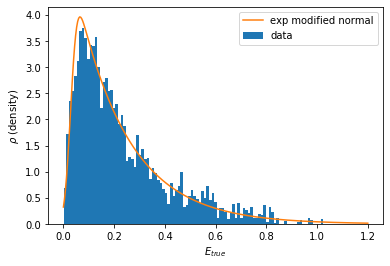

In [91]:
print('nuel')
plot_prior_distro(nu_1)

numu


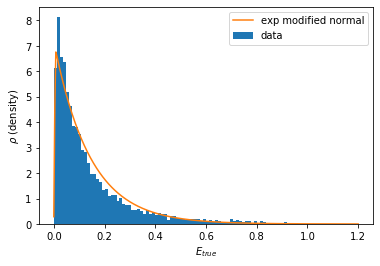

In [92]:
print('numu')
plot_prior_distro(nu_2)

nutau


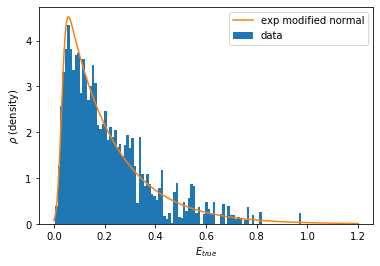

In [93]:
print('nutau')
plot_prior_distro(nu_3)

## 1d histograms

Pixel sums in (x,y) representation



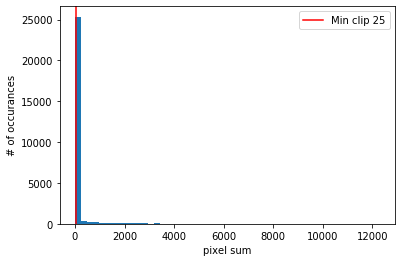

In [9]:
#clip_size = np.where(X_train <= min_clip)[0].shape[0]
#print('Cuts', clip_size / train_size * 100., '% of the dataset')

print("Pixel sums in (x,y) representation\n")
plt.hist(X_train, bins=50)

plt.axvline(x=min_clip, c='r', label='Min clip ' + str(min_clip))

plt.xlabel('pixel sum')
plt.ylabel('# of occurances')
plt.legend()
plt.show()

Normalised true energies



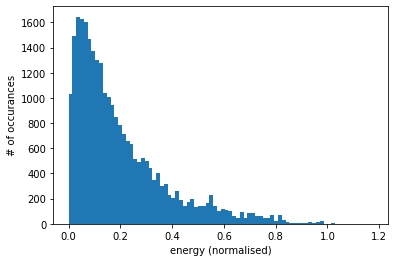

In [10]:
print("Normalised true energies\n")
plt.hist(y_train, bins=80)
plt.xlabel('energy (normalised)')
plt.ylabel('# of occurances')
plt.show()

Pixel sums in (x,y) representation



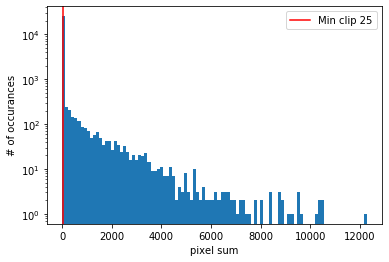

In [11]:
print("Pixel sums in (x,y) representation\n")
plt.hist(X_train, bins=100, log=True)

plt.axvline(x=min_clip, c='r', label='Min clip ' + str(min_clip))

plt.xlabel('pixel sum')
plt.ylabel('# of occurances')
plt.legend()
plt.show()

Normalised true energies



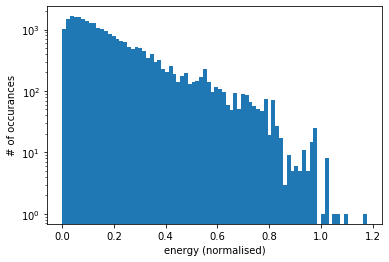

In [12]:
print("Normalised true energies\n")
plt.hist(y_train, bins=80, log=True)
plt.xlabel('energy (normalised)')
plt.ylabel('# of occurances')
plt.show()

## 2d histograms

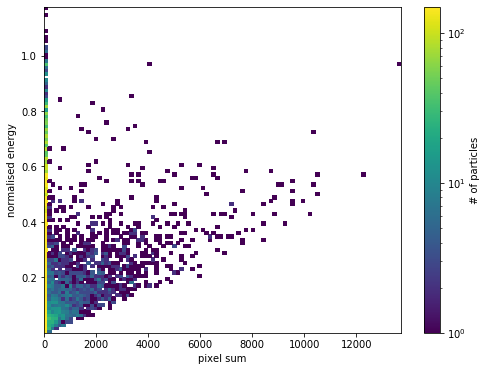

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

hist = ax.hist2d(full_X[:, 0], full_y[:, 0], 
                 bins=100, 
                 norm=mpl.colors.LogNorm(), 
                 vmax=150)

plt.xlabel('pixel sum')
plt.ylabel('normalised energy')

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')

plt.show()

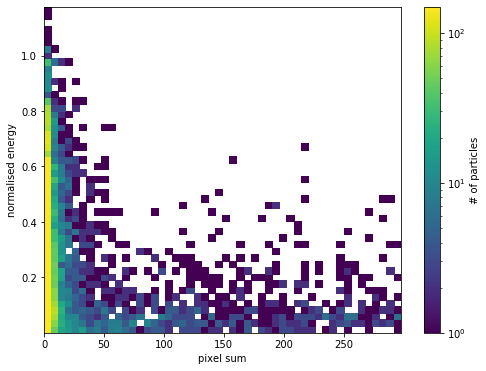

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

idx = np.where(full_X < 300)

hist = ax.hist2d(full_X[idx], 
                 full_y[idx], 
                 bins=(50,50), 
                 norm=mpl.colors.LogNorm(), 
                 vmax=150)

plt.xlabel('pixel sum')
plt.ylabel('normalised energy')

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')

plt.show()